# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.  

Likelihood is maximized at 1.067 for N=3
Likelihood is maximized at 1.055 for N=10
Likelihood is maximized at 1.099 for N=10


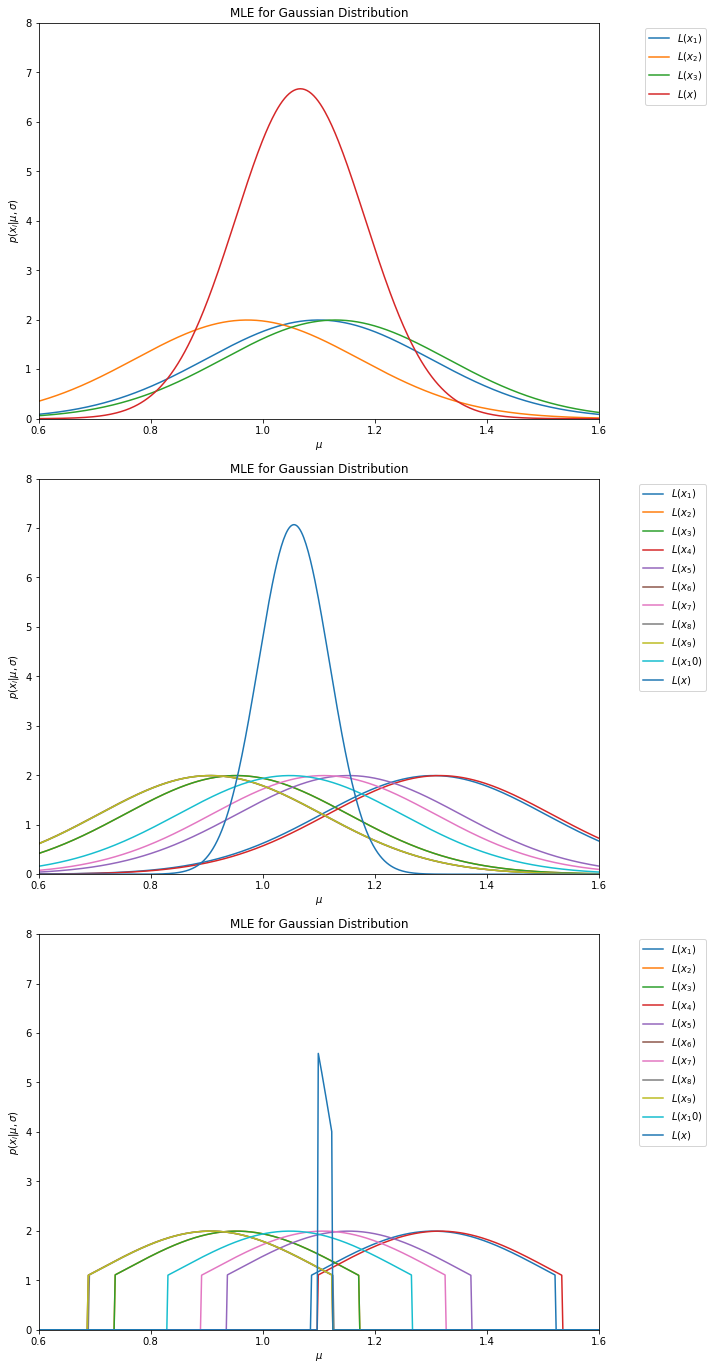

In [35]:
#Load up the algorithms we are going to need.
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
np.random.seed(42)

#Initial Variables
n = [3, 10, 10]
mu = 1.0
sigma = 0.2 
muGrid = np.linspace(0, 2, 1000)
splot = 411
f = plt.figure(figsize = (10, 25))#15))

for j, N in enumerate(n):
    #Setup for each n
    if j < 2:
        sample = norm(mu, sigma).rvs(N)
    L = 1
    List_L = []
    temp = []

    #Multiply all L's
    for i in range(N):
        temp = norm.pdf(muGrid, loc = sample[i], scale = sigma)
        
        #Mask on the last one
        if j == 2:
            mask = temp <= 1.1
            temp[mask] = 0
        
        List_L.append(temp)
        L *= temp

    #Print solution
    indices = np.argsort(L)
    index_max = indices[-1]
    print("Likelihood is maximized at %.3f for N={}".format(N) % muGrid[index_max])    
    
    #Plot
    f.add_subplot(splot)
    for i in range(N):
        plt.plot(muGrid, List_L[i], ls='-', label=r'$L(x_{})$'.format(i + 1))
    plt.plot(muGrid, L / (N - 2), ls='-', label=r'$L({x})$')
    _ = plt.xlim([0.6, 1.6])
    _ = plt.ylim([0, 8])
    _ = plt.xlabel('$\mu$') #Leave out or adjust if no latex
    _ = plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
    _ = plt.title('MLE for Gaussian Distribution')
    _ = plt.legend(bbox_to_anchor=(1.2, 1))
    
    #Next subplot
    splot += 1

plt.tight_layout()

Since the data is drawn from a distribution with $\mu = 1$, limiting the range of solutions to $\mu > 1.1$ forces the solution to be at the limit of 1.1 when it would otherwise be closer to the true value of 1.

## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started.

Difference of Day N and N+1:  1.6474942153177352e-05
Difference of Day N and N+1:  1.751525422599709e-05


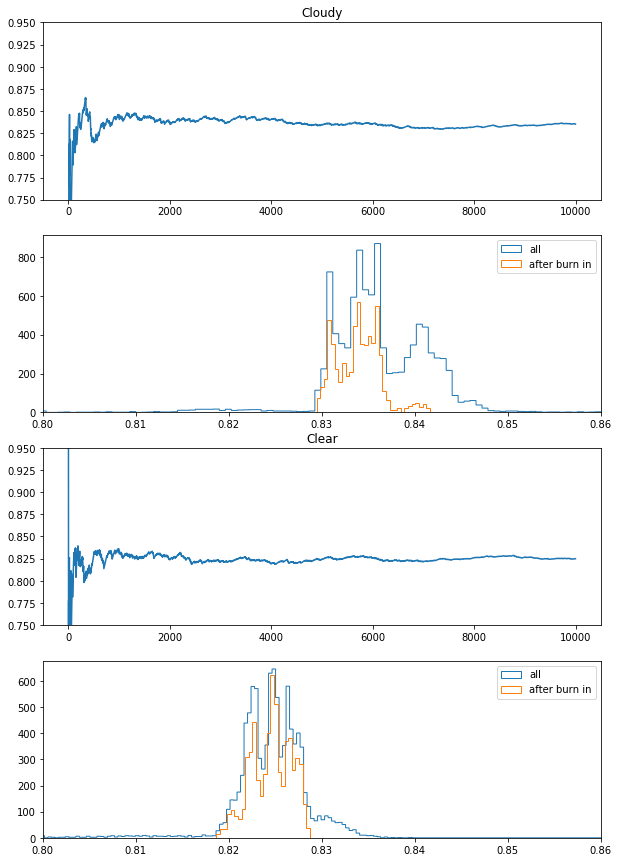

In [36]:
from astroML.plotting import hist as fancyhist

#Initial Variables
states = ["Cloudy", "Clear"]
transition_matrix = [[0.5, 0.5], [0.9, 0.1]]
transition_name = [["CdCd","CdCr"],["CrCr", "CrCd"]]
N = 10000
f = plt.figure(figsize = (10, 15))
splot = 411

#Forecast
def forecast(N, today):
    #Setup
    cd = 0
    cr = 0
    
    #Iterate over number of days
    for i in range(N):
        #Append current values
        days.append(i)
        if i != 0:
            pclear.append(cr / (cd + cr))
        elif i == 0 and today == "Clear":
            pclear.append(1)
        elif i == 0 and today == "Cloudy":
            pclear.append(0)
            
        #Move to next day and add to count
        if today == "Cloudy":
            new = np.random.choice(transition_name[0], replace = True, p = transition_matrix[0])
            cd += 1
            
            if new == "CdCr":
                today = "Clear"
            elif new == "CdCd":
                today = "Cloudy"
        elif today == "Clear":
            new = np.random.choice(transition_name[1], replace = True, p = transition_matrix[1])
            cr += 1
            
            if new == "CrCr":
                today = "Clear"
            elif new == "CrCd":
                today = "Cloudy"
                
#Start with cloudy and clear days
for start in states:
    #Reset lists
    days = []
    pclear = []

    #Get probabilities for range of days
    forecast(N, start)
    
    #At steady state, N and N + 1 days have the same value
    print("Difference of Day N and N+1: ", abs(pclear[9998] - pclear[9999]))
    
    #Plot trace
    f.add_subplot(splot)
    _ = plt.plot(days, pclear)
    _ = plt.ylim([0.75, 0.95])
    _ = plt.title('{}'.format(start))

    #Plot histogram
    pclear_abi = pclear[4000:]
    f.add_subplot(splot + 1)
    _ = fancyhist(pclear, bins = "freedman", histtype = "step")
    _ = fancyhist(pclear_abi, bins = "freedman", histtype = "step")
    _ = plt.legend(['all', 'after burn in'])
    _ = plt.xlim([0.8, 0.86])
    
    #Go to next subplot
    splot += 2

Starting on either a clear or cloudy day both result in ~0.83 at the steady state. In both cases, both N and N + 1 days have the same value.